In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import warnings

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

color_pal = sns.color_palette()

plt.rcParams["figure.figsize"] = (17, 5)

In [4]:
df = pd.read_csv("PJME_hourly.csv", parse_dates=["Datetime"])
df.set_index("Datetime", inplace=True)

df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<AxesSubplot:xlabel='Datetime'>

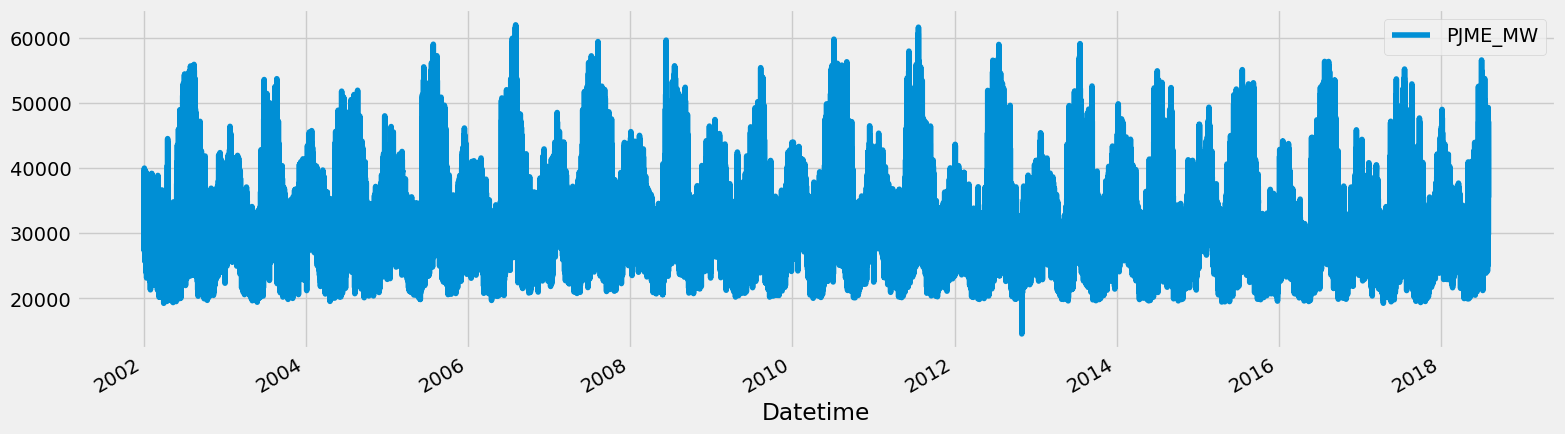

In [5]:
df.plot(color=color_pal[0])

In [6]:
# Outliers

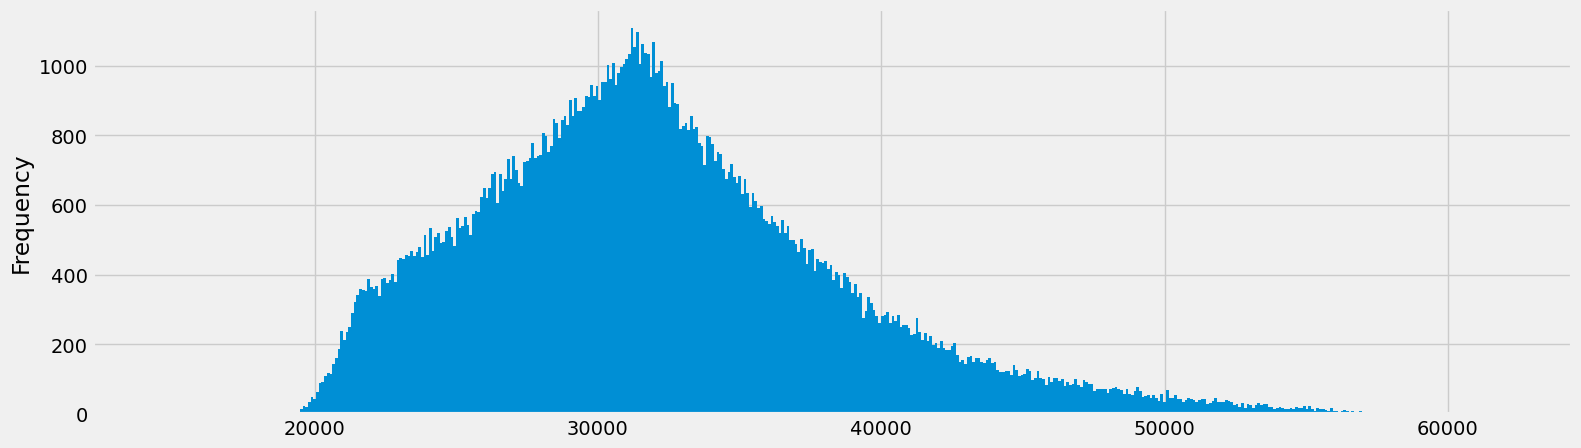

In [7]:
df["PJME_MW"].plot(kind="hist", bins=500)
plt.show()

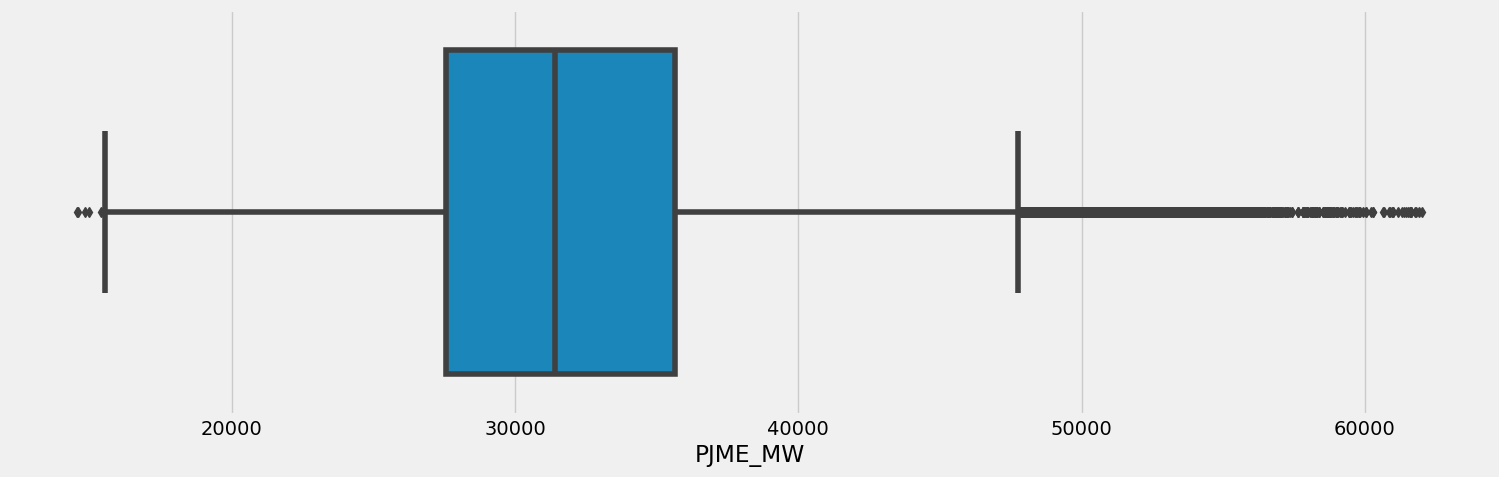

In [8]:
sns.boxplot(df["PJME_MW"])
plt.show()

<AxesSubplot:xlabel='Datetime'>

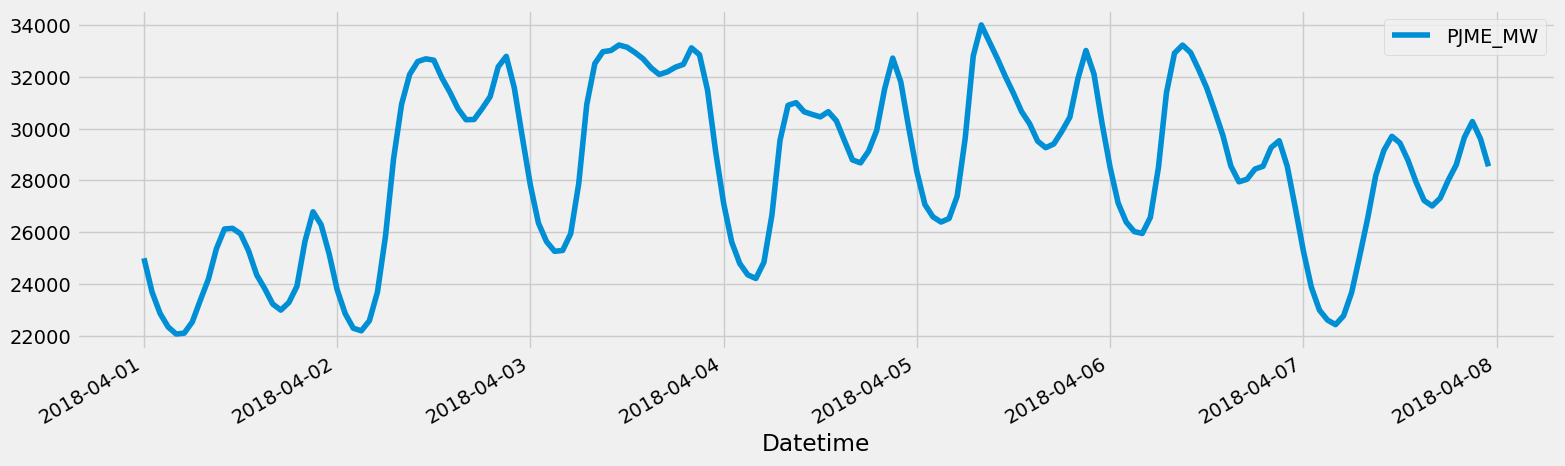

In [9]:
df[(df.index >= "2018-04-01") & (df.index < "2018-04-08")].plot()

In [10]:
train = df.loc[df.index < "2015-01-01"]
train.tail()

,PJME_MW
Datetime,
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0
2014-01-01 23:00:00,32215.0
2014-01-02 00:00:00,30159.0


In [11]:
test = df.loc[df.index >= "2015-01-01"]
test.head()

,PJME_MW
Datetime,
2015-01-01 00:00:00,32802.0
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0


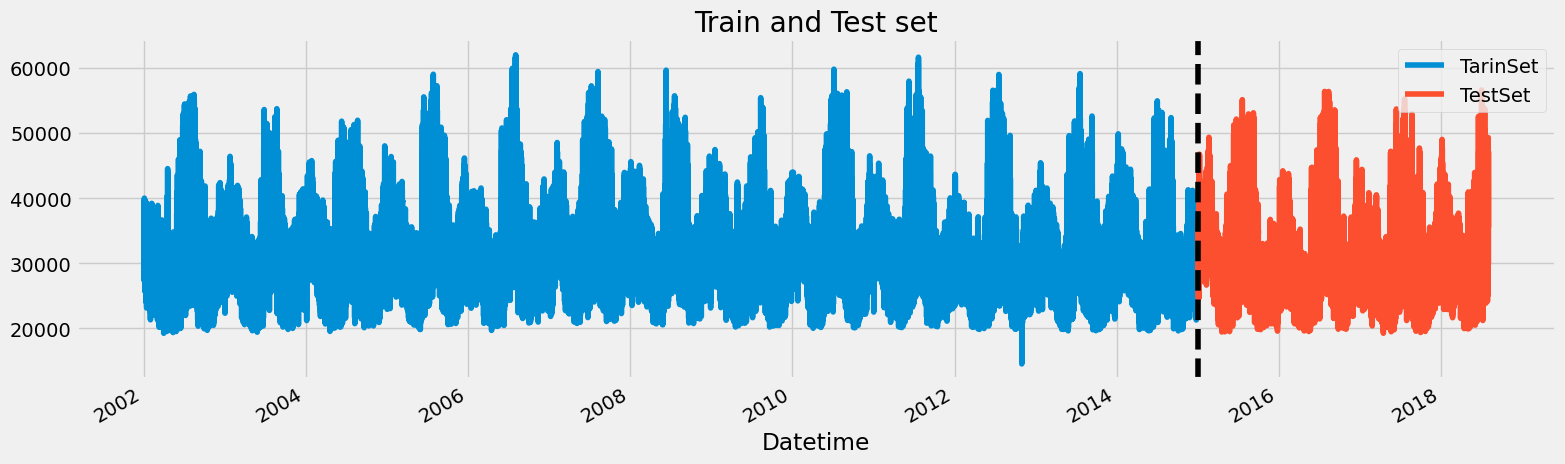

In [12]:
fig, ax = plt.subplots(figsize=(17,5))

train.plot(ax=ax, label="Train Set", title="Train and Test set")
test.plot(ax=ax, label="Test Set")
ax.axvline("2015-01-01", color="black", ls="dashed")
ax.legend(["TarinSet", "TestSet"])

plt.show()

In [13]:
def create_featute(df):
    
    df = df.copy()
    df["Hour"] = df.index.hour
    df["Day"] = df.index.day
    df["Weekday"] = df.index.weekday
    df["Dayofweek"] = df.index.dayofweek
    df["Month"] = df.index.month
    df["Quarter"] = df.index.quarter
    df["Year"] = df.index.year
    df["Dayofyear"] = df.index.dayofyear
    df["Daysinmonth"] = df.index.daysinmonth
    df["Leapyear"] = df.index.is_leap_year
    df["Startofmonth"] = df.index.is_month_start
    
    return df


In [14]:
df = create_featute(df)

df.head()

,PJME_MW,Hour,Day,Weekday,Dayofweek,Month,Quarter,Year,Dayofyear,Daysinmonth,Leapyear,Startofmonth
Datetime,,,,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,31,1,1,12,4,2002,365,31,False,False
2002-12-31 02:00:00,25147.0,2,31,1,1,12,4,2002,365,31,False,False
2002-12-31 03:00:00,24574.0,3,31,1,1,12,4,2002,365,31,False,False
2002-12-31 04:00:00,24393.0,4,31,1,1,12,4,2002,365,31,False,False
2002-12-31 05:00:00,24860.0,5,31,1,1,12,4,2002,365,31,False,False


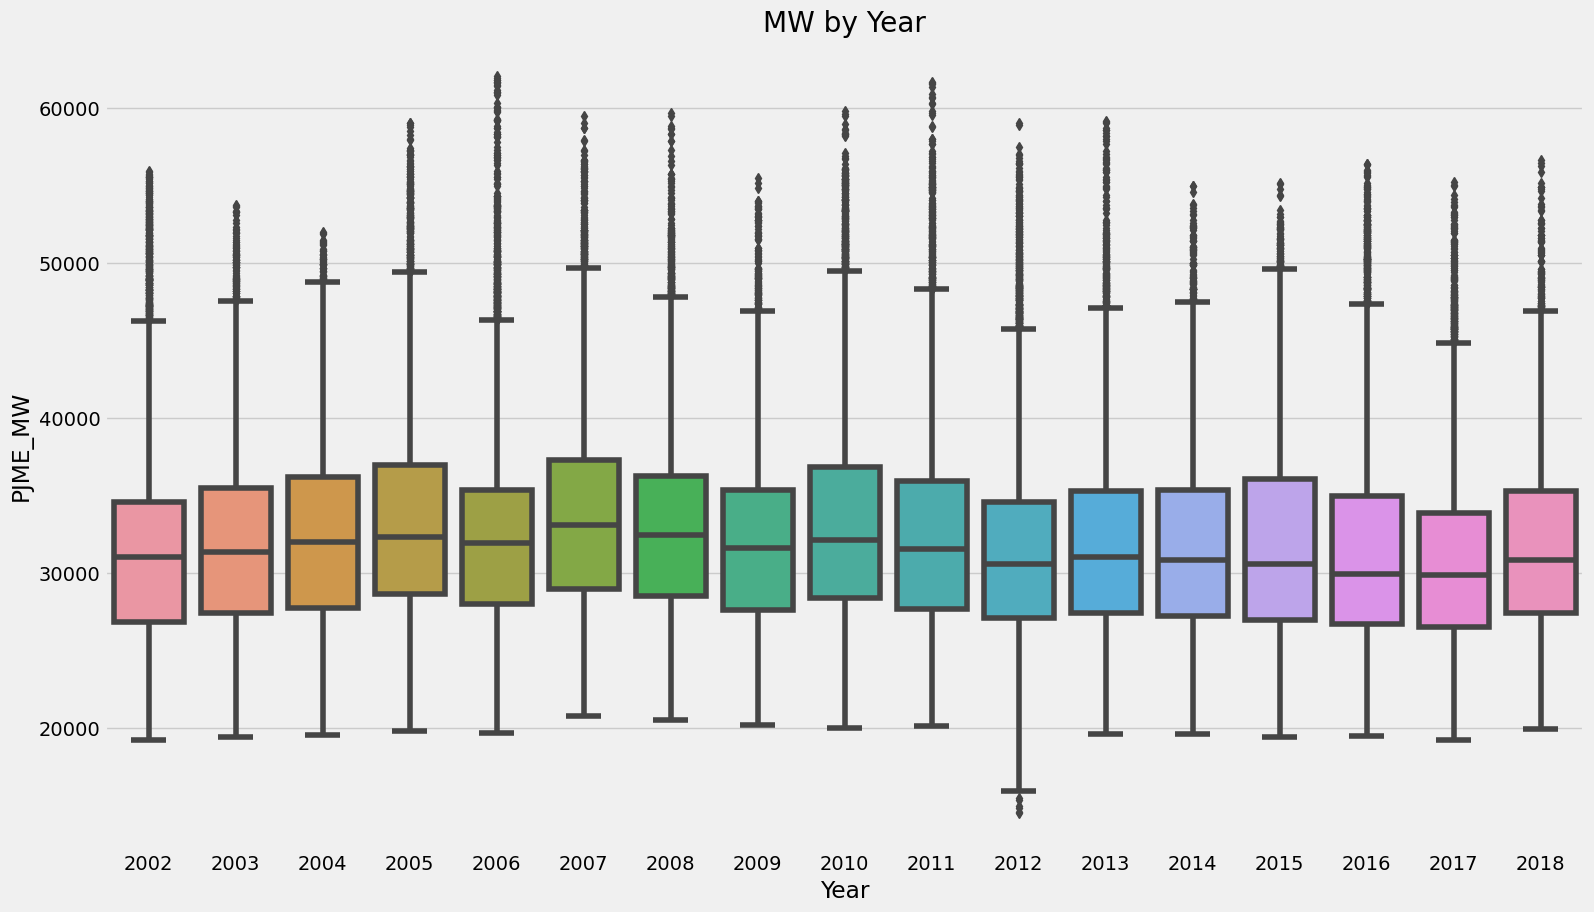

In [15]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="Year", y="PJME_MW")
plt.title("MW by Year")

plt.show()

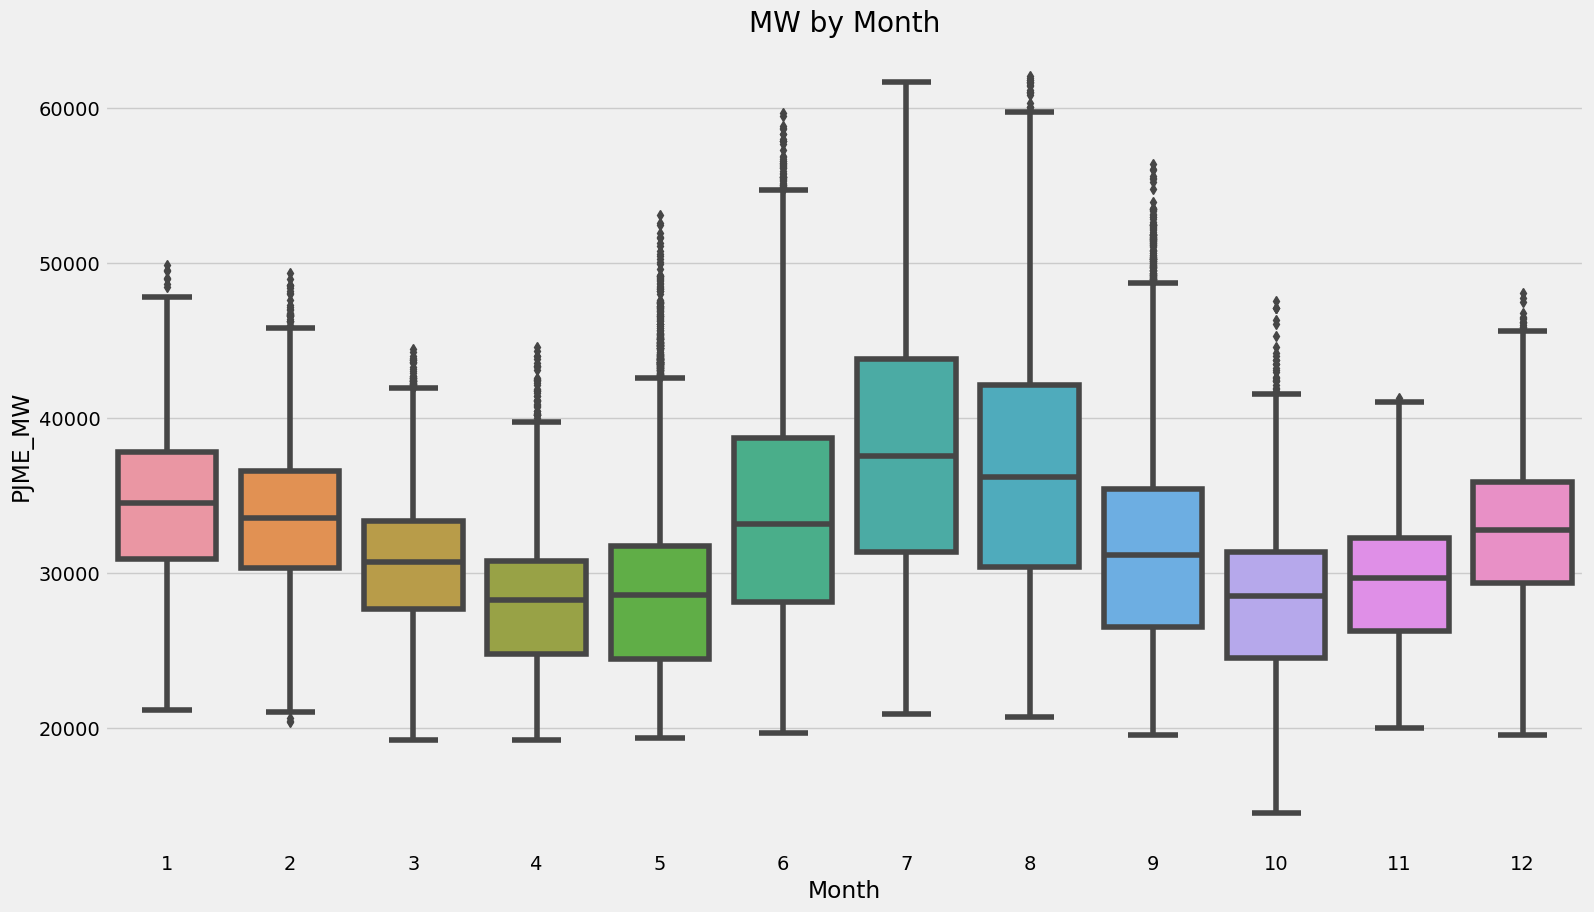

In [16]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="Month", y="PJME_MW")
plt.title("MW by Month")

plt.show()

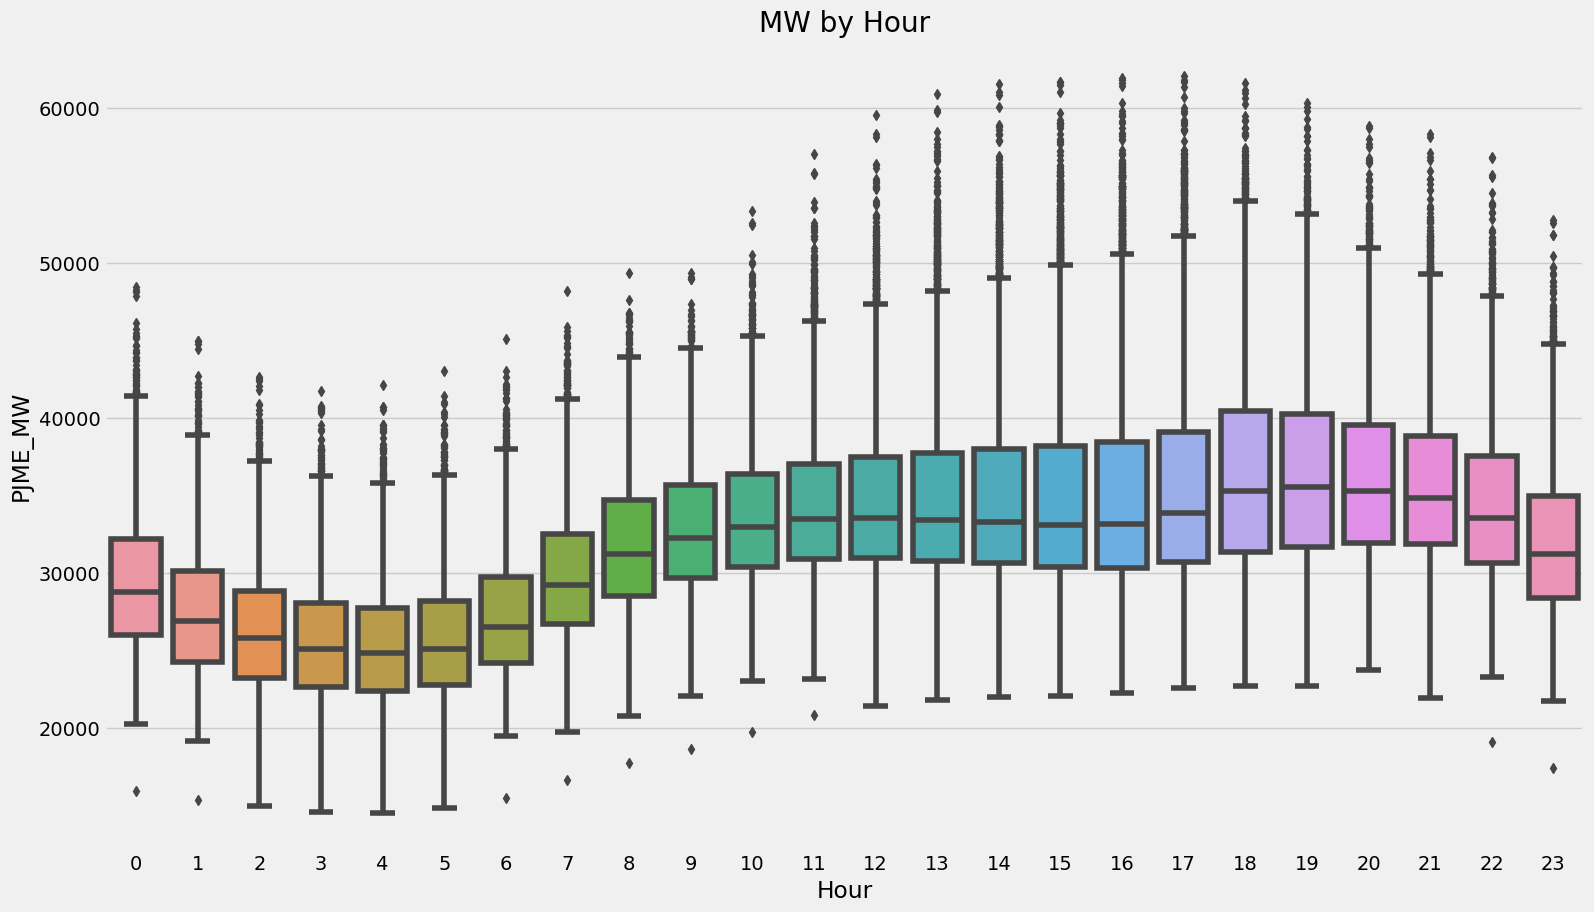

In [17]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="Hour", y="PJME_MW")
plt.title("MW by Hour")

plt.show()

In [18]:
# Creat our Model

In [19]:
train = create_featute(train)
test = create_featute(test)

In [20]:
df.columns

Index(['PJME_MW', 'Hour', 'Day', 'Weekday', 'Dayofweek', 'Month', 'Quarter',
       'Year', 'Dayofyear', 'Daysinmonth', 'Leapyear', 'Startofmonth'],
      dtype='object')

In [21]:
FEATURES = ['Hour', 'Day', 'Weekday', 'Dayofweek', 'Month', 'Quarter', 'Year', 'Dayofyear', 'Daysinmonth', 'Leapyear', 'Startofmonth']
TARGET = 'PJME_MW'

In [22]:
X_train = train[FEATURES]
y_train = train[TARGET]

In [23]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [24]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate=0.01)
history = reg.fit(X_train, y_train,
                   eval_set=[(X_train, y_train), (X_test, y_test)],       
                   verbose=100)

[0]	validation_0-rmse:32601.86337	validation_1-rmse:31654.83292
[100]	validation_0-rmse:12341.81929	validation_1-rmse:11522.79633
[200]	validation_0-rmse:5372.74837	validation_1-rmse:5164.00116
[300]	validation_0-rmse:3372.30071	validation_1-rmse:3837.60986
[400]	validation_0-rmse:2878.88186	validation_1-rmse:3718.27140
[436]	validation_0-rmse:2789.55427	validation_1-rmse:3729.55615


In [25]:
fi = pd.DataFrame(history.feature_names_in_,history.feature_importances_).reset_index()
fi.set_index([0], inplace=True)

<AxesSubplot:xlabel='0'>

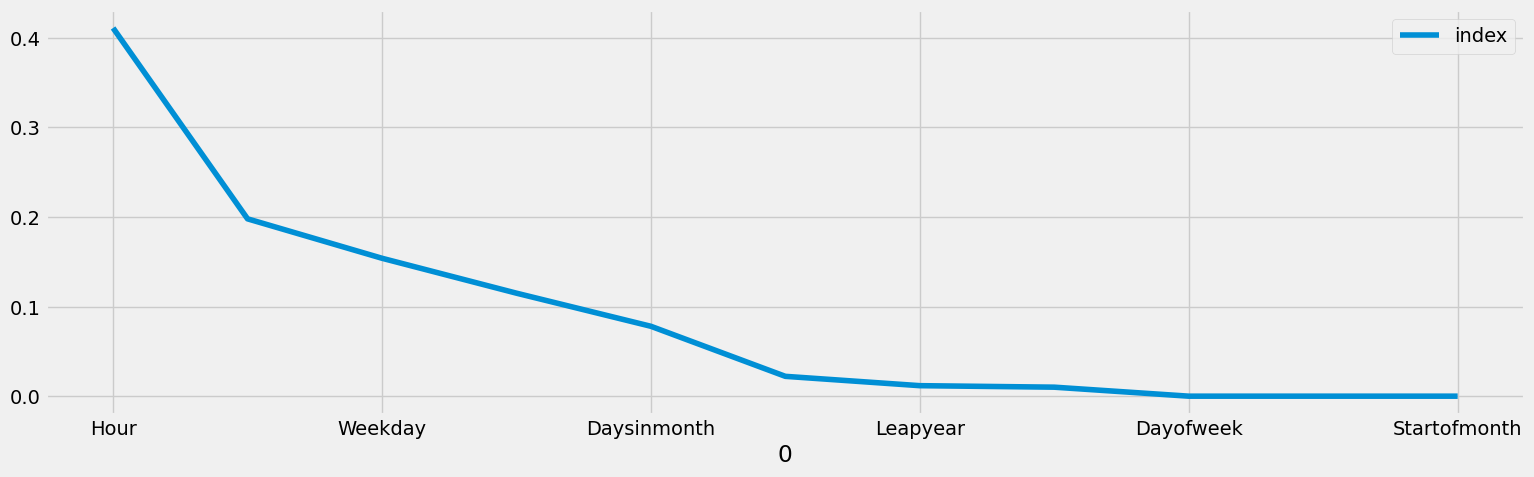

In [26]:
fi.sort_values(by=["index"], ascending=False).plot()

In [27]:
fi2 = pd.DataFrame(data=reg.feature_importances_, 
            index=reg.feature_names_in_,
            columns=["importance"])
fi2.sort_values(by=["importance"])

fi2

,importance
Hour,0.411080
Day,0.010046
Weekday,0.153981
Dayofweek,0.000000
Month,0.197992
Quarter,0.000000
Year,0.022146
Dayofyear,0.115002
Daysinmonth,0.078029
Leapyear,0.011725


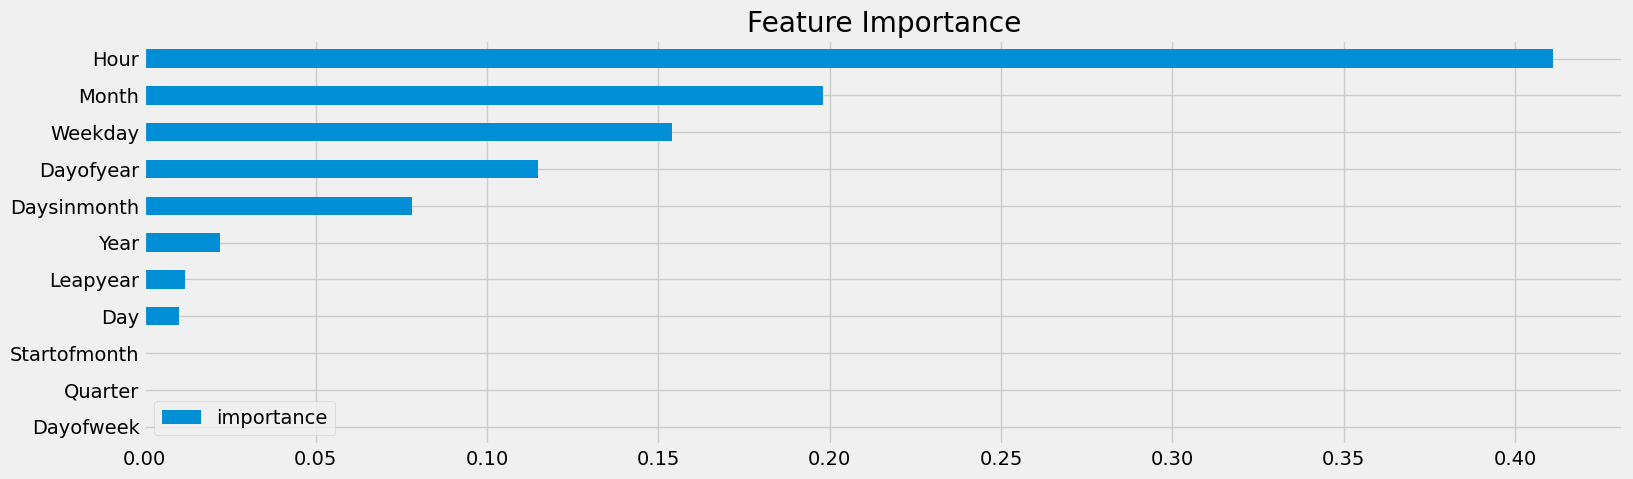

In [28]:
fi2.sort_values(by=["importance"]).plot(kind="barh", title="Feature Importance")
plt.show()

In [29]:
# Forcasting

In [30]:
test["Prediction"] = reg.predict(X_test)

In [31]:
df = df.merge(test[["Prediction"]], how='left', left_index=True, right_index=True)

[]

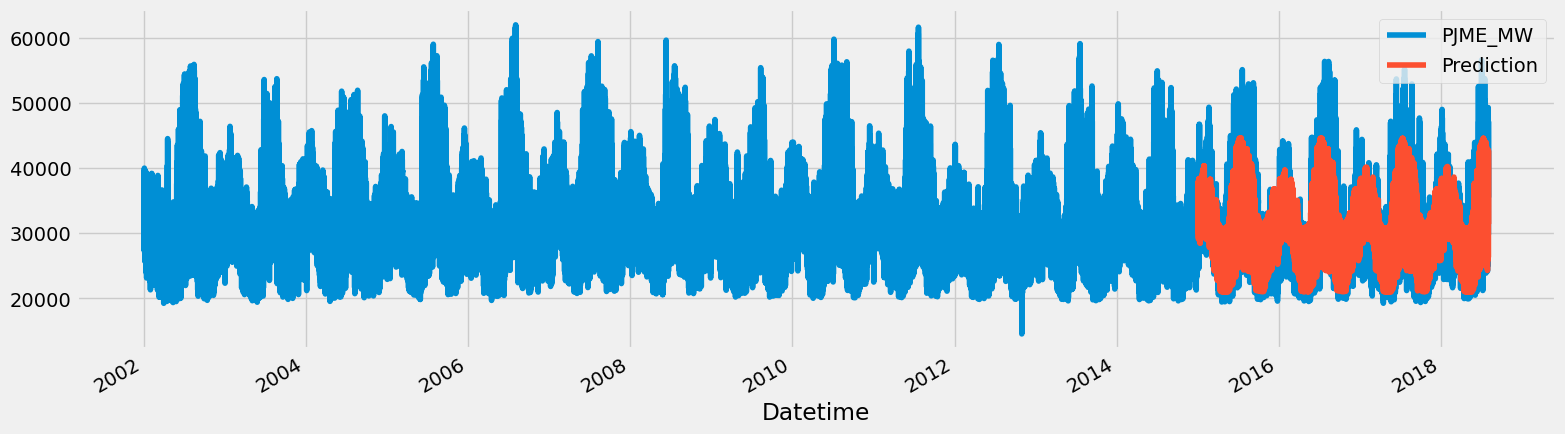

In [32]:
df[["PJME_MW", "Prediction"]].plot()
plt.plot()

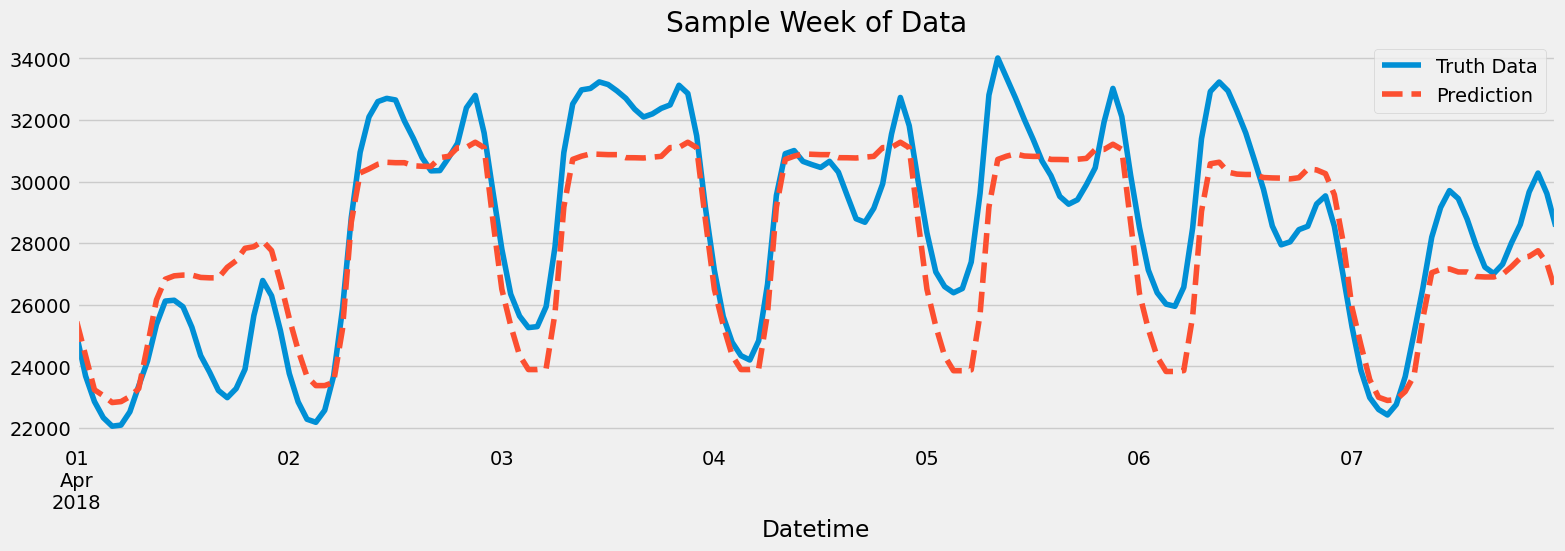

In [33]:
#df[(df.index >= "2013-01-01") & (df.index < "2013-01-07")]["PJME_MW", "Prediction"].plot()

ax = df.loc[(df.index >= "2018-04-01") & (df.index < "2018-04-08")]["PJME_MW"].plot(figsize=(17,5), title="Sample Week of Data")
df.loc[(df.index >= "2018-04-01") & (df.index < "2018-04-08")]["Prediction"].plot(style="--")
plt.legend(["Truth Data", "Prediction"])

plt.show()


In [34]:
rmse = np.sqrt(mean_squared_error(test["PJME_MW"], test["Prediction"]))
rmse

3716.6434835802916

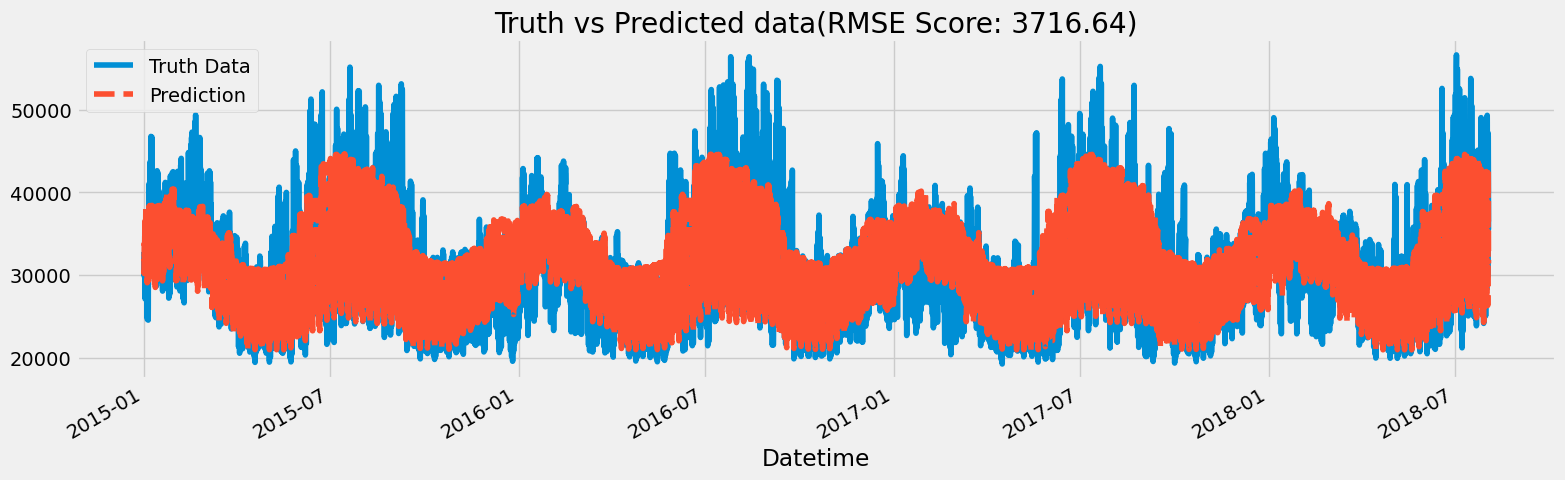

In [35]:
ax = test["PJME_MW"].plot(figsize=(17,5), title="Truth vs Predicted data" + "(" + f'RMSE Score: {rmse:0.2f}'+ ")")
test["Prediction"].plot(style="--")
plt.legend(["Truth Data", "Prediction"])

plt.show()


In [36]:
#Calculate Error

In [37]:
test["Error"] = np.abs(test[TARGET] - test["Prediction"])

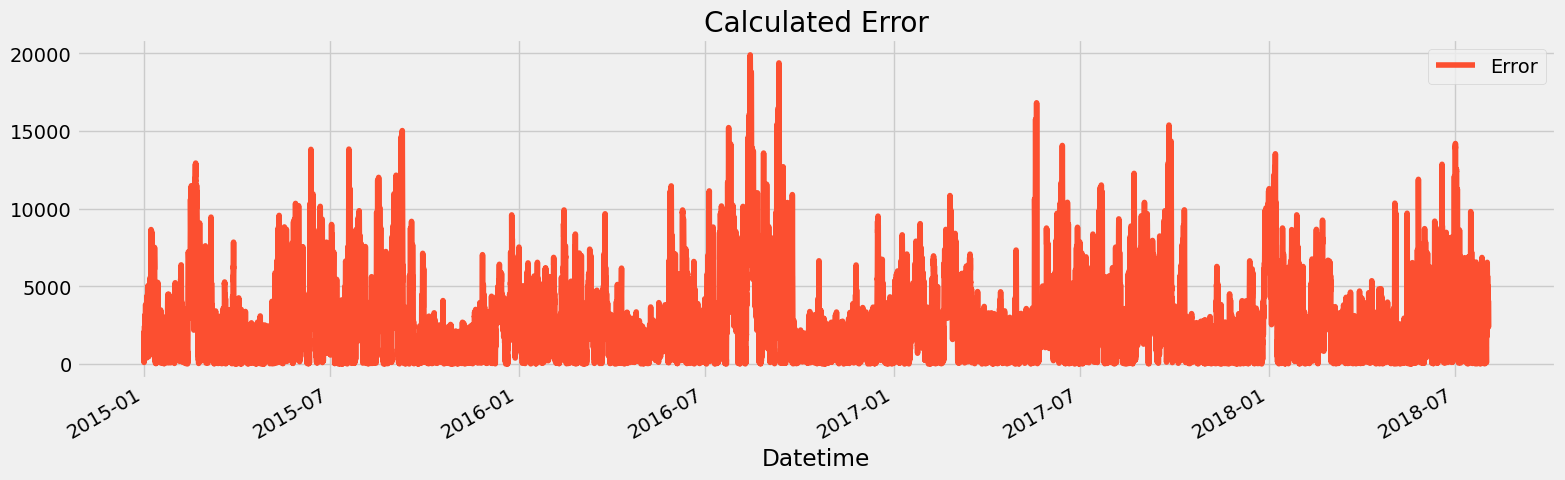

In [38]:
ax = test["Error"].plot(figsize=(17,5), title="Calculated Error", color=color_pal[1])
#test["Prediction"].plot(style="")
plt.legend(["Error", "Prediction"])

plt.show()